In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
#import mpld3
from matplotlib import pyplot as plt

In [4]:
#names = np.array(["Theresa_May.txt","Tony_Blair.txt","Gordon_Brown.txt","Alec_Douglas.txt","David_Cameron.txt"
 #                 ,"Edward_Heath.txt","Harold_Wilson.txt","James_Callaghan.txt","John_Major.txt",
  #                "Margaret_Thatcher.txt","David_Gilmour_Pink_Floyd1.txt","Roger_Waters_Pink_Floyd.txt"
   #               ,"Gordon_Brown_Britannica.txt"])
    
names = np.array(["Theresa_May.txt","Tony_Blair.txt","Gordon_Brown.txt","Alec_Douglas.txt","David_Cameron.txt"
                  ,"Edward_Heath.txt","Harold_Wilson.txt","James_Callaghan.txt","John_Major.txt",
                  "Margaret_Thatcher.txt","Harold_Macmillan.txt","Anthony_Eden.txt","Winston_Churchill.txt"]) 

party = np.array(["tory","labour","labour","tory","tory,"])
summary = []

for name in names:
    print(name)
    f = open("Text_Files//"+name,encoding="utf8")
    summary.append(f.read())



Theresa_May.txt
Tony_Blair.txt
Gordon_Brown.txt
Alec_Douglas.txt
David_Cameron.txt
Edward_Heath.txt
Harold_Wilson.txt
James_Callaghan.txt
John_Major.txt
Margaret_Thatcher.txt
Harold_Macmillan.txt
Anthony_Eden.txt
Winston_Churchill.txt


In [5]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [6]:

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [7]:
stemmed_list = []
tokenized_list = []
for i in summary:
    
    allwords_stemmed = tokenize_and_stem(i)
    stemmed_list.append(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    tokenized_list.append(allwords_tokenized)
    
    

In [8]:
vocab_frame = pd.DataFrame({'words': allwords_tokenized}, index = allwords_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')


there are 25670 items in vocab_frame


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.6, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(summary) #fit the vectorizer to synopses
terms = tfidf_vectorizer.get_feature_names() #apparently this reduces the features??

print(tfidf_matrix.shape)

/Users/marioskassapis/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 4.34 s, sys: 75.3 ms, total: 4.41 s
Wall time: 4.49 s
(13, 688)


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances as distance
dist = 1 - cosine_similarity(tfidf_matrix)
#dist2 = distance(tfidf_matrix)
#dist2.shape
#print(dist2)

[[-0.29127026 -0.23085111 -0.38350476 -0.26799523 -0.02694406 -0.15321915
   0.44497897  0.00576663  0.04866658 -0.03283352]
 [-0.49609019  0.77773728 -0.01729482  0.08383401  0.16086624  0.52276838
   0.02759443  0.07410213  0.08928417  0.0104914 ]
 [-0.44213999  0.77960688  0.14299277 -0.14677157  0.01205157 -0.51105844
  -0.20881119  0.03136909  0.00442169 -0.01603055]
 [ 0.59157058 -0.20936201  0.06270866 -0.20028545  0.28457263  0.02416237
  -0.11760222  0.04305325 -0.01262618  0.15434338]
 [-0.38957393 -0.17167112 -0.48121415 -0.26631544  0.11551664 -0.00641204
  -0.0326327   0.0241056  -0.08578845  0.10305478]
 [-0.04959657 -0.54637211  0.10165436  0.23029214 -0.0176886  -0.03688349
  -0.07221664  0.31601374  0.05334156 -0.14698275]
 [-0.0819728  -0.11646885  0.64895449 -0.34880268 -0.29735327  0.15531342
   0.08576544  0.03399299 -0.21260598  0.01648237]
 [-0.18356175 -0.4171012   0.30990141 -0.21963478 -0.19817738  0.0452445
  -0.10037208 -0.19476991  0.26639237 -0.01068512]
 

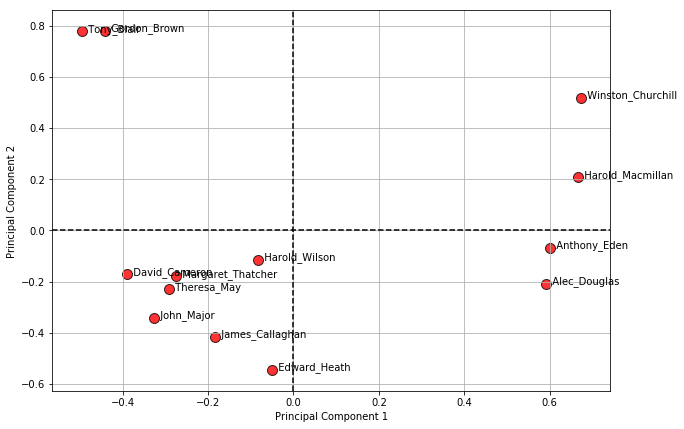

In [11]:
#try to perform a PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

coordinates = pca.fit_transform(dist)
print(coordinates)
print(np.sum(np.abs(coordinates),axis = 0))

fig, ax = plt.subplots(figsize = (10,7))

ax.scatter(coordinates[:,0], coordinates[:,1], color = "red", marker = "o", s = 100,alpha = 0.8, edgecolors = "black")
for i, txt in enumerate(names):
    ax.annotate("  "+txt[:-4], (coordinates[i,0], coordinates[i,1]))
    
#plt.legend()
plt.grid()
plt.axvline(linestyle = "--", color = "black")
plt.axhline(linestyle = "--", color = "black")
#plt.axis([-1,1,-0.75,0.75])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.savefig("PCA_Clusters.pdf")

#we see that the singers and 2 gordon browns bias our PCA towards a certain direction and should better be excluded


